### Author - Mohammmed Ramees
### GRIP - The Sparks Foundation
### Data Science and Business Analytics internship (April 2021)
# Prediction using unsupervised ML

In [11]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [12]:
# Loading dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Elbow method

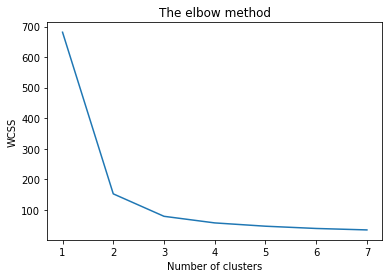

In [8]:
# For finding the optimum number of clusters.

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# plotting graph
plt.plot(range(1, 8), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### From this we choose the number of clusters as 3

## Applying Kmeans to the dataset

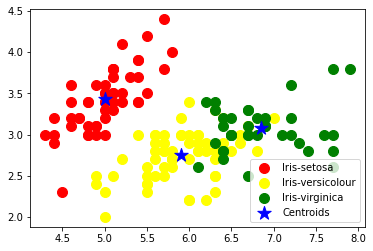

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 88)
y_kmeans = kmeans.fit_predict(x)

# Plotting clusters and centroids.

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200, c = 'blue',marker = '*', label = 'Centroids')

plt.legend()

Thus we have obtained 3 clusters.
#### Making predictions from the required value

In [10]:
x=[5.1,4.6,3.0,6.7]
kmeans.predict([x])

array([1])